Contexto: Este conjunto de dados é feito para obter as percepções dos inadimplentes de cartão de crédito com base em alguns atributos!

Temos atributos como IncomeTotal, AMTAPPLICATION, AMT_CREDIT e cerca de 122 colunas no conjunto de dados de um aplicativo bancário..
Tomamos esse conjunto de dados como nossa atribuição e tentamos executar um processo de análise que nos permite extraír insights de negócios da melhor maneira possível!
Além disso, aplicamos formas de balancear os dados para testar a acurácia dos modelos que podem ser usados para a detecção de fraude em novos clientes que irão utilizar o aplicativo.

Como o dataset tem 122 colunas, foi ponderado quais eram mais interessantes usar para o treinamento do modelo e fazer analises de modo que o processamento dos dados não demorasse.
Para isso, as seguintes colunas foram dropadas restando apenas as colunas a seguir:

**Important Columns**

- AMT_CREDIT: Valor do crédito do empréstimo
- SK_ID_CURR: ID do empréstimo em nossa amostra
- TARGET: Variável alvo (1 - cliente com dificuldades de pagamento: atrasou mais de X dias em pelo menos uma das primeiras Y prestações do empréstimo da nossa amostra, 0 - todos os outros casos)
- AMT_INCOME_TOTAL: Renda do cliente
- AMT_ANNUITY: anuidade do empréstimo
- AMT_GOODS_PRICE: Para empréstimos ao consumidor, é o preço dos bens para os quais o empréstimo é concedido
- NAME_INCOME_TYPE: Tipo de renda do cliente (empresário, trabalho, licença maternidade,…)
- HOUR_APPR_PROCESS_START: A que horas aproximadamente o cliente solicitou o empréstimo
- ORGANIZATION_TYPE: Tipo de organização onde o cliente trabalha

## Imports

In [ ]:
# data analysis
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#machine learning

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
import scipy.stats as scs


# Leitura da base

In [ ]:
data=pd.read_csv('/content/application_data.csv')
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Data cleaning



Aqui retiramos algumas colunas, por notar que estão poluindo nossos dados.

In [ ]:
data.drop(["FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","OWN_CAR_AGE","FLAG_MOBIL",
         "FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","FLAG_EMAIL","CNT_FAM_MEMBERS","REGION_RATING_CLIENT",
         "REGION_RATING_CLIENT_W_CITY","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","NAME_TYPE_SUITE",
         "LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY"],axis=1,inplace=True)

data.drop(['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1,inplace=True)

data.drop(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG','NAME_CONTRACT_TYPE',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE','WEEKDAY_APPR_PROCESS_START',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE'],axis=1,inplace=True)

In [ ]:
# Conferindo se há nulos na base
data.isna().sum()

SK_ID_CURR                     0
TARGET                         0
CODE_GENDER                    0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                   12
AMT_GOODS_PRICE              278
NAME_INCOME_TYPE               0
OCCUPATION_TYPE            96391
HOUR_APPR_PROCESS_START        0
ORGANIZATION_TYPE              0
dtype: int64

In [ ]:
# Conferindo se o tipo de dados de cada coluna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SK_ID_CURR               307511 non-null  int64  
 1   TARGET                   307511 non-null  int64  
 2   CODE_GENDER              307511 non-null  object 
 3   AMT_INCOME_TOTAL         307511 non-null  float64
 4   AMT_CREDIT               307511 non-null  float64
 5   AMT_ANNUITY              307499 non-null  float64
 6   AMT_GOODS_PRICE          307233 non-null  float64
 7   NAME_INCOME_TYPE         307511 non-null  object 
 8   OCCUPATION_TYPE          211120 non-null  object 
 9   HOUR_APPR_PROCESS_START  307511 non-null  int64  
 10  ORGANIZATION_TYPE        307511 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 25.8+ MB


In [ ]:
data.head()

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,OCCUPATION_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
0,100002,1,M,202500.0,406597.5,24700.5,351000.0,Working,Laborers,10,Business Entity Type 3
1,100003,0,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Core staff,11,School
2,100004,0,M,67500.0,135000.0,6750.0,135000.0,Working,Laborers,9,Government
3,100006,0,F,135000.0,312682.5,29686.5,297000.0,Working,Laborers,17,Business Entity Type 3
4,100007,0,M,121500.0,513000.0,21865.5,513000.0,Working,Core staff,11,Religion


In [ ]:
data['CODE_GENDER'] = data['CODE_GENDER'].replace('XNA',None)

In [ ]:
# preenchendo valores nulos com media, moda ou mediana
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i].fillna(data[i].mode()[0], inplace=True)
    else:
        data[i].fillna(data[i].median(), inplace=True)
print(data)

        SK_ID_CURR  TARGET CODE_GENDER  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           100002       1           M          202500.0    406597.5   
1           100003       0           F          270000.0   1293502.5   
2           100004       0           M           67500.0    135000.0   
3           100006       0           F          135000.0    312682.5   
4           100007       0           M          121500.0    513000.0   
...            ...     ...         ...               ...         ...   
307506      456251       0           M          157500.0    254700.0   
307507      456252       0           F           72000.0    269550.0   
307508      456253       0           F          153000.0    677664.0   
307509      456254       1           F          171000.0    370107.0   
307510      456255       0           F          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE      NAME_INCOME_TYPE OCCUPATION_TYPE  \
0           24700.5         351000.0               Workin

In [ ]:
data.isna().sum()

SK_ID_CURR                 0
TARGET                     0
CODE_GENDER                0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_ANNUITY                0
AMT_GOODS_PRICE            0
NAME_INCOME_TYPE           0
OCCUPATION_TYPE            0
HOUR_APPR_PROCESS_START    0
ORGANIZATION_TYPE          0
dtype: int64

In [ ]:
 # aqui podemos notar, ao contar nossa variavel alvo que os dados estão desbalanceados
data['TARGET'].value_counts()/data['TARGET'].count()

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [ ]:
data.describe()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000
mean,278180.518577,0.080729,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,12.063419
std,102790.175348,0.272419,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,3.265832
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000000
25%,189145.500000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,10.000000
50%,278202.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,12.000000
75%,367142.500000,0.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,14.000000
max,456255.000000,1.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,23.000000


In [ ]:
data.shape

(307511, 11)

In [ ]:
data.head()

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,OCCUPATION_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
0,100002,1,M,202500.0,406597.5,24700.5,351000.0,Working,Laborers,10,Business Entity Type 3
1,100003,0,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Core staff,11,School
2,100004,0,M,67500.0,135000.0,6750.0,135000.0,Working,Laborers,9,Government
3,100006,0,F,135000.0,312682.5,29686.5,297000.0,Working,Laborers,17,Business Entity Type 3
4,100007,0,M,121500.0,513000.0,21865.5,513000.0,Working,Core staff,11,Religion


In [ ]:
data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [ ]:
# deixando os valores da coluna ORGANIZATION_TYPE genéricos
industry = ['Industry: type 9', 'Industry: type 8', 'Industry: type 10', 'Industry: type 6',
            'Industry: type 13', 'Industry: type 5', 'Industry: type 2', 'Industry: type 4',
            'Industry: type 7', 'Industry: type 11', 'Industry: type 3', 'Industry: type 12',
            'Industry: type 1']
trade = ['Trade: type 5', 'Trade: type 4', 'Trade: type 1', 'Trade: type 6', 'Trade: type 2',
         'Trade: type 3', 'Trade: type 7']
transport = ['Transport: type 4', 'Transport: type 1', 'Transport: type 2', 'Transport: type 3']

business = ['Business Entity Type 2', 'Business Entity Type 1', 'Business Entity Type 3']

In [ ]:
for i in industry:
  data.loc[data['ORGANIZATION_TYPE'] == i, 'ORGANIZATION_TYPE'] = 'industry'

for i in business:
  data.loc[data['ORGANIZATION_TYPE'] == i, 'ORGANIZATION_TYPE'] = 'business'


for i in transport:
  data.loc[data['ORGANIZATION_TYPE'] == i, 'ORGANIZATION_TYPE'] = 'transport'

for i in transport:
  data.loc[data['ORGANIZATION_TYPE'] == i, 'ORGANIZATION_TYPE'] = 'transport'

for i in trade:
  data.loc[data['ORGANIZATION_TYPE'] == i, 'ORGANIZATION_TYPE'] = 'trade'

In [ ]:
data['ORGANIZATION_TYPE'].value_counts()

business               84529
XNA                    55374
Self-employed          38412
Other                  16683
trade                  14315
industry               14311
Medicine               11193
Government             10404
transport               8990
School                  8893
Kindergarten            6880
Construction            6721
Security                3247
Housing                 2958
Military                2634
Bank                    2507
Agriculture             2454
Police                  2341
Postal                  2157
Security Ministries     1974
Restaurant              1811
Services                1575
University              1327
Hotel                    966
Electricity              950
Insurance                597
Telecom                  577
Emergency                560
Advertising              429
Realtor                  396
Culture                  379
Mobile                   317
Legal Services           305
Cleaning                 260
Religion      

In [ ]:
data.head()

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,OCCUPATION_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
0,100002,1,M,202500.0,406597.5,24700.5,351000.0,Working,Laborers,10,business
1,100003,0,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Core staff,11,School
2,100004,0,M,67500.0,135000.0,6750.0,135000.0,Working,Laborers,9,Government
3,100006,0,F,135000.0,312682.5,29686.5,297000.0,Working,Laborers,17,business
4,100007,0,M,121500.0,513000.0,21865.5,513000.0,Working,Core staff,11,Religion


# Analise Exploratória

verificando os tipos das colunas, posteriormente iremos usar essa informação para retirar outliers das colunas numéricas


## Descrição

In [ ]:
numerical= data.drop(['TARGET'], axis=1).select_dtypes('number').columns

categorical = data.select_dtypes('object').columns

print(f'Colunas numéricas:  {data[numerical].columns}')
print('\n')
print(f'Colunas categóricas: {data[categorical].columns}')

Colunas numéricas:  Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START'],
      dtype='object')


Colunas categóricas: Index(['CODE_GENDER', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE'],
      dtype='object')


In [ ]:
# colocando como 'valor faltante' nos outliers, pois há algumas inconsistencias nos extremos
# criando uma função que irá fazer isso:
def exclui_outliers(data, col_name):
  intervalo = 2*data[col_name].std()
  media = data[col_name].mean()
  data.loc[data[col_name] < (media - intervalo), col_name] = np.nan
  data.loc[data[col_name] > (media + intervalo), col_name] = np.nan

#executando a função nas colunas onde havia erros perceptiveis nos outiliers
numerical_cols = ['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START']
for col in numerical_cols:
  exclui_outliers(data, col)

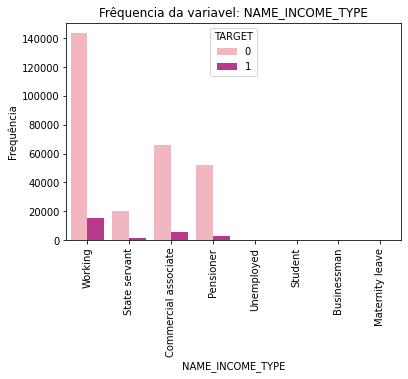

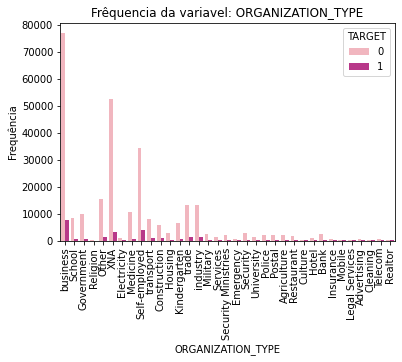

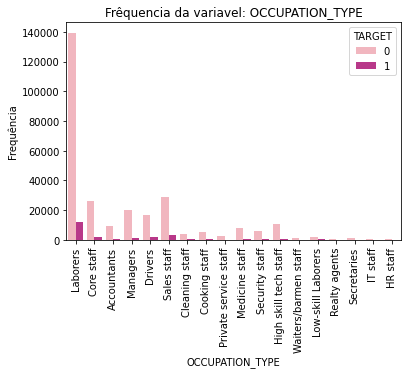

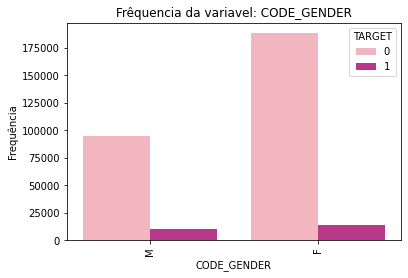

<Figure size 432x288 with 0 Axes>

In [ ]:
x=['NAME_INCOME_TYPE', 'ORGANIZATION_TYPE','OCCUPATION_TYPE','CODE_GENDER']
k=2
for i in x:
    plt.xticks(rotation=90)
    ax = sns.countplot(x=i,hue='TARGET', data=data, palette = 'RdPu')
    plt.title(f'Frêquencia da variavel: {i}')
    plt.ylabel('Frequência')
    plt.figure(k)
    plt.clf()
    k=k+1

In [ ]:
def show_fraud_prop(df):
    print("número de registros no dataframe:", len(df))
    print("número positivos de fraudes:", df["TARGET"].sum())
    print("proporção de alvos positivos:", df["TARGET"].sum() / len(df))

print("Fraude entre homens:")
show_fraud_prop(data[data["CODE_GENDER"] == "M"])
print("Fraude entre mulheres:")
show_fraud_prop(data[data["CODE_GENDER"] == "F"])

Fraude entre homens:
número de registros no dataframe: 105060
número positivos de fraudes: 10655
proporção de alvos positivos: 0.10141823719779174
Fraude entre mulheres:
número de registros no dataframe: 202451
número positivos de fraudes: 14170
proporção de alvos positivos: 0.0699922450370707


Pelos gráficos acima podemos desenhar um peril dos clientes com fraude e clientes de verdade. Primeiramente, vemos que entre a classe de fraude temos que o tipo de renda é trabalho e o tipo de organização mais frequente entre as fraudes é o business. Além disso, mulheres possuem mais chances de serem fraudulentas nessa amostra.
Como os dados são desbalanceados vemos poucas fraudes entre os perfis


Agora vamos comparar a fraude entre os que ganham mais com a fraude entre os que ganham menos.

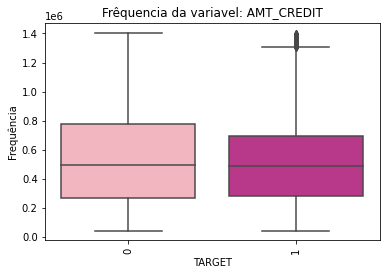

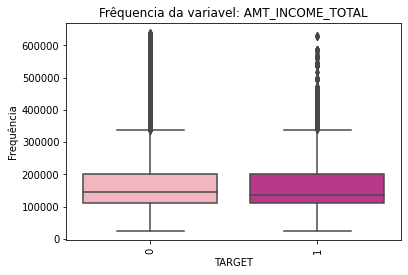

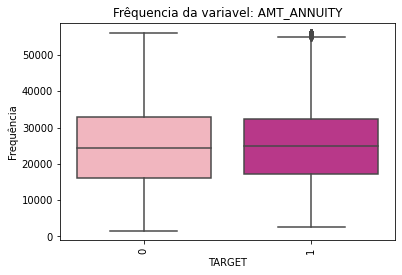

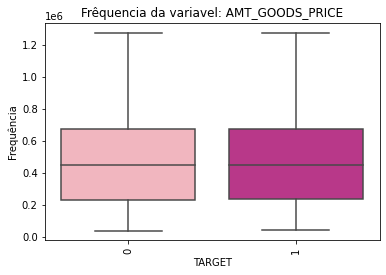

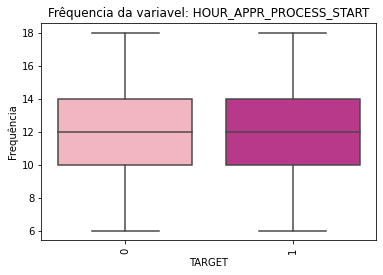

<Figure size 432x288 with 0 Axes>

In [ ]:
x=['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START']
k=2
for i in x:
    plt.xticks(rotation=90)
    ax = sns.boxplot(y=i,x='TARGET', data=data, palette = 'RdPu')
    plt.title(f'Frêquencia da variavel: {i}')
    plt.ylabel('Frequência')
    plt.figure(k)
    plt.clf()
    k=k+1


In [ ]:
print("fraude de alto rendimento na renda do cliente")
show_fraud_prop(data[data["AMT_INCOME_TOTAL"] > 2.025000e+05])

print("fraude de baixo rendimento na renda do cliente")
show_fraud_prop(data[data["AMT_INCOME_TOTAL"] < 1.125000e+05])

fraude de alto rendimento na renda do cliente
número de registros no dataframe: 70100
número positivos de fraudes: 4870
proporção de alvos positivos: 0.06947218259629101
fraude de baixo rendimento na renda do cliente
número de registros no dataframe: 69559
número positivos de fraudes: 5723
proporção de alvos positivos: 0.0822754783708794


Para cada variável numérica fizemos um boxplot a fim de ver a distribuição dos dados.
O valor do crédito do empréstimo de quem era fraude é um pouco menor apesar de a mediana ser semelhante entre os clientes de verdade e os fraudulentos.

In [ ]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [ ]:
grouped_data =  data.groupby(["AMT_CREDIT","NAME_INCOME_TYPE"], as_index=False)["AMT_CREDIT"].sum()
grouped_data.head(10)

,NAME_INCOME_TYPE,AMT_CREDIT
0,Commercial associate,1620000.0
1,Pensioner,2655000.0
2,State servant,675000.0
3,Working,5400000.0
4,Commercial associate,863460.0
5,Pensioner,4125420.0
6,State servant,431730.0
7,Working,5036850.0
8,Working,48519.0
9,Pensioner,445095.0


In [ ]:
grouped_data['NAME_INCOME_TYPE'].value_counts()

Working                 3863
Commercial associate    3399
Pensioner               2917
State servant           2263
Student                   17
Unemployed                17
Businessman                6
Maternity leave            4
Name: NAME_INCOME_TYPE, dtype: int64

## Estatísticas

Aqui iremos destacar algumas estatisticas dos nossos dados, que podem ser usadas para criar OKrs para uma empresa.

In [ ]:
def statitics_columns(df):
  for col in df.columns:
      if df[col].dtypes != object:
          q1 = df[col].quantile(0.25)
          q3 = df[col].quantile(0.75)
          IQR = q3 - q1
          llp = q1-1.5*IQR
          ulp = q3+1.5*IQR
          print('Nome da coluna:',col)
          print('Média: ',df[col].mean())
          print('Moda: ',df[col].mode()[0])
          print('Mediana: ',df[col].median())
          print('assimetria:',df[col].skew())
          print('Medida de curtose:',df[col].kurtosis())
          print('\n')

statitics_columns(data)

Nome da coluna: SK_ID_CURR
Média:  278180.51857657125
Moda:  100002.0
Mediana:  278202.0
assimetria: -0.0012002350768207104
Medida de curtose: -1.1989877778996432


Nome da coluna: TARGET
Média:  0.08072881945686496
Moda:  0
Mediana:  0.0
assimetria: 3.0781586659196685
Medida de curtose: 7.475109389392569


Nome da coluna: AMT_INCOME_TOTAL
Média:  164961.90748100946
Moda:  135000.0
Mediana:  144000.0
assimetria: 1.4513282075716223
Medida de curtose: 3.048379657011286


Nome da coluna: AMT_CREDIT
Média:  549304.9643087548
Moda:  450000.0
Mediana:  495351.0
assimetria: 0.6608735220983597
Medida de curtose: -0.4628331780895647


Nome da coluna: AMT_ANNUITY
Média:  25489.713333851287
Moda:  9000.0
Mediana:  24331.5
assimetria: 0.469634050061862
Medida de curtose: -0.45601321010767526


Nome da coluna: AMT_GOODS_PRICE
Média:  483157.947239207
Moda:  450000.0
Mediana:  450000.0
assimetria: 0.6784362909778151
Medida de curtose: -0.41486691865897596


Nome da coluna: HOUR_APPR_PROCESS_START
Mé

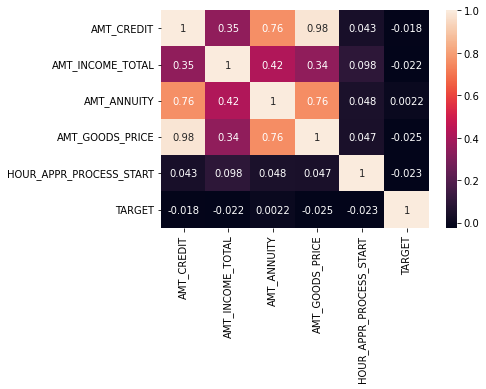

In [ ]:
# correlação das variáveis quantitativas
corrnum = data[['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START','TARGET']].corr()
sns.heatmap(corrnum, annot=True)

No geral, as variáveis apresentam pouca correlação entre a nossa variável alvo.

# Separando em treino e teste


In [ ]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(data,test_size=0.3,random_state=1)


In [ ]:
df_train.head()

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,OCCUPATION_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
208983,342217.0,0,F,202500.0,585000.0,29250.0,585000.0,State servant,Managers,10.0,Government
71687,183133.0,0,F,112500.0,656811.0,30564.0,567000.0,Pensioner,Laborers,11.0,XNA
301340,449106.0,0,M,144000.0,450000.0,22500.0,450000.0,Commercial associate,Laborers,10.0,business
216927,351350.0,0,F,450000.0,NaN,51687.0,NaN,State servant,Laborers,18.0,Security Ministries
109091,226525.0,0,M,202500.0,454500.0,19255.5,454500.0,Commercial associate,Drivers,9.0,business


In [ ]:
df_test.head()

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,OCCUPATION_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
64282,174545.0,1,F,135000.0,654498.0,31617.0,585000.0,Pensioner,Laborers,9.0,XNA
94645,209898.0,0,M,135000.0,234576.0,25393.5,202500.0,Working,Drivers,17.0,Government
306349,454938.0,0,M,112500.0,157914.0,16753.5,139500.0,Working,Laborers,14.0,Other
258314,398930.0,0,M,247500.0,1125000.0,36292.5,1125000.0,Working,Security staff,16.0,Security
87597,201672.0,0,M,202500.0,900000.0,35158.5,900000.0,Working,Drivers,8.0,Self-employed


In [ ]:
df_test.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

## Balanceamento de dados

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import imblearn
from sklearn.datasets import make_classification
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification

sns.set_style('dark')

A pricipio fazemos 3 tipos de balanceamento de dados para testar as acurácias dos modelos e ver o que melhor se adequa para nossa solução

### Under-sampling

No Under-sampling reduzimos o numero de dados de uma classe que é maioria e assim diminuimos a diferença entre as categorias do nosso target


Random under-sampling:
0    17358
1    17358
Name: TARGET, dtype: int64


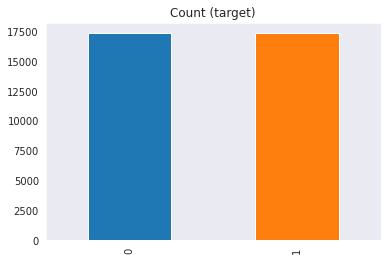

In [ ]:
# CONTAR CLASSES train
count_class_0, count_class_1 = df_train.TARGET.value_counts()
# Divide by class
df_class_0 = df_train[df_train['TARGET'] == 0]
df_class_1 = df_train[df_train['TARGET'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)
print('Random under-sampling:')
print(df_train_under.TARGET.value_counts())
df_train_under.TARGET.value_counts().plot(kind='bar', title='Count (target)',color = ['#1F77B4', '#FF7F0E']);

Random under-sampling:
0    7467
1    7467
Name: TARGET, dtype: int64


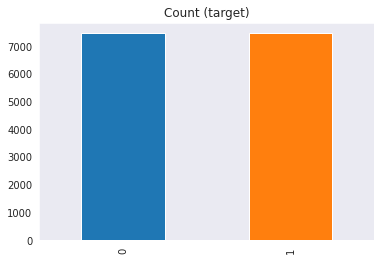

In [ ]:
# CONTAR CLASSES Teste
count_class_0_test, count_class_1_test = df_test.TARGET.value_counts()
# Divide by class
df_class_0_test = df_test[df_test['TARGET'] == 0]
df_class_1_test = df_test[df_test['TARGET'] == 1]

df_class_0_test = df_class_0_test.sample(count_class_1_test)
df_test_under = pd.concat([df_class_0_test, df_class_1_test], axis=0)
print('Random under-sampling:')
print(df_test_under.TARGET.value_counts())
df_test_under.TARGET.value_counts().plot(kind='bar', title='Count (target)',color = ['#1F77B4', '#FF7F0E']);

### Over-samplig

Ao contrário do Under-sampling. No Over-sampling aumentamos o numero de dados de uma classe que é maioria e assim diminuímos a diferença entre as categorias do nosso target.

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
# Random Oversampler
# Balanceando treino
X = df_train.drop('TARGET',axis=1)
y = df_train.TARGET
ros_train = RandomOverSampler(random_state = 32)
X_train, y_train = ros_train.fit_resample(X, y)

# Balanceando test
X_t = df_test.drop('TARGET',axis=1)
y_t = df_test.TARGET
ros_test = RandomOverSampler(random_state = 32)
X_test, y_test = ros_test.fit_resample(X_t, y_t)


### Smote

No SMOTE tentamos simular os dados da classe que menos aparece como um todo, assim, criamos observações intermediarias para equilibrar as classes do nosso target.

In [ ]:
#SMOTE
# Balanceando treino

smote = SMOTE(random_state = 32)
X = data.drop('TARGET',axis=1)
y = data.TARGET

X = pd.get_dummies(X)
X = (X - X.min())/(X.max()-X.min())
X = X.fillna(0)

X_smote_train, y_smote_train = smote.fit_resample(X, y)

# Modelos

Os modelos escolhidos para o projeto foram o Random Forest, por apresentar uma arvore de decisão baseando-se nas classes, onde podemos extrair as feature importances, e a Regressão Logistica para termos noções numéricas das probabiblidades de inadinplência.

## Random Forest

### Usando Under-sampling

In [ ]:
df_test_under.head()

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,OCCUPATION_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
132566,253759.0,0,F,135000.0,797557.5,44662.5,688500.0,Working,Laborers,8.0,Self-employed
63429,173559.0,0,M,225000.0,904500.0,32616.0,904500.0,Working,Managers,12.0,trade
53922,162475.0,0,M,90000.0,659610.0,18265.5,472500.0,Working,Laborers,14.0,business
203286,335673.0,0,M,135000.0,269550.0,21294.0,225000.0,Working,Laborers,11.0,business
80759,193630.0,0,M,202500.0,454500.0,54067.5,454500.0,Commercial associate,Accountants,14.0,Realtor


In [ ]:
df_train_under

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,OCCUPATION_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
24249,128206.0,0,F,405000.0,NaN,NaN,NaN,Working,Accountants,9.0,transport
124285,244127.0,0,F,153000.0,450000.0,21649.5,450000.0,Working,Laborers,13.0,School
223065,358369.0,0,F,157500.0,NaN,49905.0,NaN,Working,Laborers,11.0,industry
30720,135654.0,0,F,112500.0,673875.0,19701.0,562500.0,Pensioner,Laborers,15.0,XNA
83897,197303.0,0,M,157500.0,270000.0,13500.0,270000.0,Working,Laborers,8.0,Construction
...,...,...,...,...,...,...,...,...,...,...,...
150503,274472.0,1,M,247500.0,720000.0,36000.0,720000.0,Working,Laborers,10.0,Other
95529,210912.0,1,F,153000.0,225000.0,11250.0,225000.0,Working,Laborers,14.0,business
16277,118984.0,1,M,112500.0,270000.0,18040.5,270000.0,Working,Laborers,10.0,Other
194769,325841.0,1,M,112500.0,247500.0,12375.0,247500.0,Working,Laborers,11.0,Other


In [ ]:
X_train = df_train_under.drop('TARGET', axis=1)
y_train = df_train_under.TARGET

X_test = df_test_under.drop('TARGET',axis=1)
y_test = df_test_under.TARGET

In [ ]:
# One-hot encode the data using pandas get_dummies
X_train = pd.get_dummies(X_train)
X_train = X_train.drop('CODE_GENDER_M', axis = 1)
X_train = (X_train - X_train.min())/(X_train.max()-X_train.min())

X_test = pd.get_dummies(X_test)
X_test = (X_test - X_test.min())/(X_test.max()-X_test.min())

In [ ]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [ ]:
# treinando o modelo
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)

rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=44)

In [ ]:
# testando
y_predic=rf_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- CODE_GENDER_M
Feature names seen at fit time, yet now missing:
- NAME_INCOME_TYPE_Businessman

  warnings.warn(message, FutureWarning)


In [ ]:
print(accuracy_score(y_test,y_predic)*100)

57.874648453194055


Text(0.5, 1.0, 'Matriz de confusão na ordem de 10² \n')

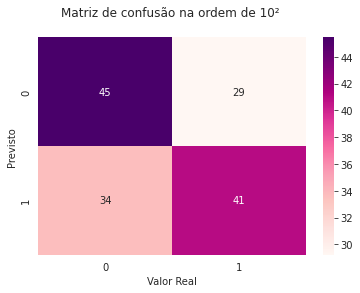

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test,y_predic)/100, annot=True, cmap="RdPu")
plt.ylabel('Previsto')
plt.xlabel('Valor Real')
plt.title('Matriz de confusão na ordem de 10² \n')

### Usando Over-sampling

In [ ]:
# One-hot encode the data using pandas get_dummies
X_train = pd.get_dummies(X_train)
X_train = X_train.drop('CODE_GENDER_M', axis = 1)

X_test = pd.get_dummies(X_test)

X_train = pd.get_dummies(X_train)
X_train = (X_train - X_train.min())/(X_train.max()-X_train.min())

X_test = pd.get_dummies(X_test)
X_test = (X_test - X_test.min())/(X_test.max()-X_test.min())

In [ ]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#Random Forest
# treinando o modelo
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train, y_train)

# testando
y_predic=rf_model.predict(X_test)



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- CODE_GENDER_M
Feature names seen at fit time, yet now missing:
- NAME_INCOME_TYPE_Businessman

  warnings.warn(message, FutureWarning)


In [ ]:
print(accuracy_score(y_test,y_predic)*100)

50.1509665396818


Text(0.5, 1.0, 'Matriz de confusão na ordem de 10² \n')

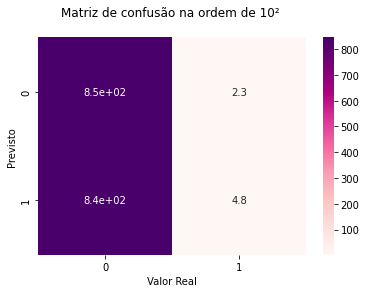

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test,y_predic)/100, annot=True, cmap="RdPu")
plt.ylabel('Previsto')
plt.xlabel('Valor Real')
plt.title('Matriz de confusão na ordem de 10² \n')

### Usando Smote

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote_train, y_smote_train, test_size=0.3, random_state=5)

In [ ]:
#Random Forest
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_predic=clf.predict(X_test)
print(accuracy_score(y_test,y_predic)*100)

93.57003042237577


Text(0.5, 15.0, 'Valor Real')

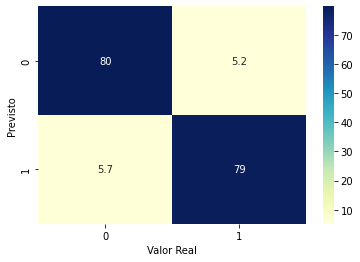

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test,y_predic)/1000, annot=True, cmap="YlGnBu")
plt.ylabel('Previsto')
plt.xlabel('Valor Real')

In [ ]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: AMT_INCOME_TOTAL     Importance: 0.18
Variable: AMT_GOODS_PRICE      Importance: 0.15
Variable: HOUR_APPR_PROCESS_START Importance: 0.14
Variable: AMT_CREDIT           Importance: 0.13
Variable: AMT_ANNUITY          Importance: 0.13
Variable: SK_ID_CURR           Importance: 0.12
Variable: CODE_GENDER_F        Importance: 0.01
Variable: CODE_GENDER_M        Importance: 0.01
Variable: NAME_INCOME_TYPE_Working Importance: 0.01
Variable: OCCUPATION_TYPE_Laborers Importance: 0.01
Variable: OCCUPATION_TYPE_Sales staff Importance: 0.01
Variable: ORGANIZATION_TYPE_Other Importance: 0.01
Variable: ORGANIZATION_TYPE_Self-employed Importance: 0.01
Variable: ORGANIZATION_TYPE_business Importance: 0.01
Variable: NAME_INCOME_TYPE_Businessman Importance: 0.0
Variable: NAME_INCOME_TYPE_Commercial associate Importance: 0.0
Variable: NAME_INCOME_TYPE_Maternity leave Importance: 0.0
Variable: NAME_INCOME_TYPE_Pensioner Importance: 0.0
Variable: NAME_INCOME_TYPE_State servant Importance: 0.0
Va

## Regressão Logistica

### Usando Under Sampling

In [ ]:
X_train = df_train_under.drop('TARGET', axis=1)
y_train = df_train_under.TARGET

X_test = df_test_under.drop('TARGET',axis=1)
y_test = df_test_under.TARGET

In [ ]:
# One-hot encode the data using pandas get_dummies
X_train = pd.get_dummies(X_train)
X_train = (X_train - X_train.min())/(X_train.max()-X_train.min())
X_train = X_train.drop('CODE_GENDER_M', axis = 1)
X_test = pd.get_dummies(X_test)
X_test = (X_test - X_test.min())/(X_test.max()-X_test.min())

In [ ]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [ ]:

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_test,y_pred)*100,'%')

57.96169813847596 %


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- CODE_GENDER_M
Feature names seen at fit time, yet now missing:
- NAME_INCOME_TYPE_Businessman

  warnings.warn(message, FutureWarning)


Text(0.5, 1.0, 'Matriz de confusão na ordem de 10² \n')

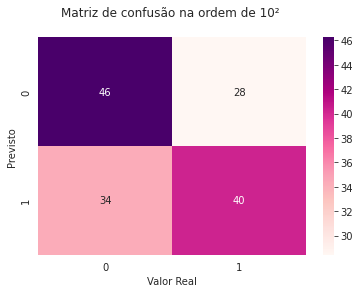

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred)/100, annot=True, cmap="RdPu")
plt.ylabel('Previsto')
plt.xlabel('Valor Real')
plt.title('Matriz de confusão na ordem de 10² \n')

### Usando Over-Sampling

In [ ]:
# One-hot encode the data using pandas get_dummies
X_train = pd.get_dummies(X_train)
X_train = X_train.drop('CODE_GENDER_M', axis = 1)

X_test = pd.get_dummies(X_test)

X_train = pd.get_dummies(X_train)
X_train = (X_train - X_train.min())/(X_train.max()-X_train.min())

X_test = pd.get_dummies(X_test)
X_test = (X_test - X_test.min())/(X_test.max()-X_test.min())



In [ ]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred)*100,'%')

57.13847641737531 %


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- CODE_GENDER_M
Feature names seen at fit time, yet now missing:
- NAME_INCOME_TYPE_Businessman

  warnings.warn(message, FutureWarning)


Text(0.5, 1.0, 'Matriz de confusão na ordem de 10³ \n')

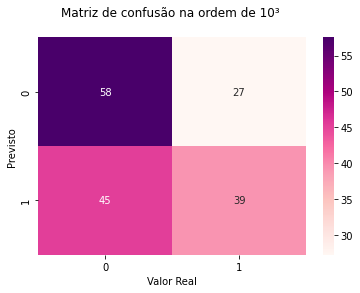

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred)/1000, annot=True, cmap="RdPu")
plt.ylabel('Previsto')
plt.xlabel('Valor Real')
plt.title('Matriz de confusão na ordem de 10³ \n')

### Usando SMOTE

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

lr.predict_proba(X_test)

array([[0.40350176, 0.59649824],
       [0.39380108, 0.60619892],
       [0.41473148, 0.58526852],
       ...,
       [0.53819282, 0.46180718],
       [0.53855034, 0.46144966],
       [0.79838595, 0.20161405]])

In [ ]:
print(accuracy_score(y_test,y_pred)*100,'%')

58.5076527604179 %


Text(0.5, 1.0, 'Matriz de confusão na ordem de 10³ \n')

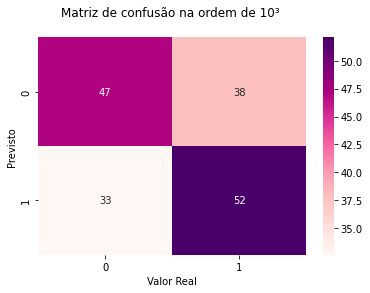

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred)/1000, annot=True, cmap="RdPu")
plt.ylabel('Previsto')
plt.xlabel('Valor Real')
plt.title('Matriz de confusão na ordem de 10³ \n')

## Conclusão dos modelos

Pelo quadro abaixo que resume os modelos, podemos notar que o SMOTE combinado com uma Random Forest apresentou melhores resultados, podendo ser usado para nosso aplicativo de detecção de fraude. Ademais, ao vericar as feature importances vimos que a renda do cliente, o preço dos bens para os quais o empréstimo é concedido e a hora que o cliente solicitou o empréstimo, foram as três features mais importantes para tomada de decisão do modelo. Dessa forma, podemos usa-las como sinal de alerta para o banco a fim de monitorar essas transações.


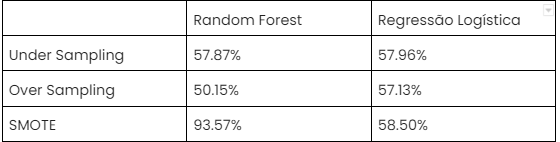

# Algumas Referências:

**DADOS**: https://www.kaggle.com/datasets/mishra5001/credit-card

https://towardsdatascience.com/bert-for-dummies-step-by-step-tutorial-fb90890ffe03

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b

https://gist.github.com/gukgurgel/c21d8a84ae8984800b399b94f15d82b9#file-score_metrics-py

https://medium.com/data-hackers/como-lidar-com-dados-desbalanceados-em-problemas-de-classifica%C3%A7%C3%A3o-17c4d4357ef9#:~:text=SOLU%C3%87%C3%95ES,Learning%20e%20Recognition%2Dbased%20learning.

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
